In [1]:
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
import numpy
from pandas.plotting import scatter_matrix
filename = 'heart_risk.csv'
raw_data = read_csv(filename)
print(raw_data.shape)
description = raw_data.describe()
print(description)
peek = raw_data.head(10)

(294, 6)
              Age         Sex          CP      Trestbps          Chol  \
count  294.000000  294.000000  294.000000    294.000000    294.000000   
mean    47.826531    0.724490    2.982993    472.265306   8054.275510   
std      7.811812    0.447533    0.965117   5824.354262  26831.639834   
min     28.000000    0.000000    1.000000     92.000000     85.000000   
25%     42.000000    0.000000    2.000000    120.000000    211.250000   
50%     49.000000    1.000000    3.000000    130.000000    248.500000   
75%     54.000000    1.000000    4.000000    140.000000    293.500000   
max     66.000000    1.000000    4.000000  99999.000000  99999.000000   

             Risk  
count  294.000000  
mean     0.792517  
std      1.237006  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      4.000000  


(array([  4,  31,  38,  61,  85,  90, 137, 138, 150, 151, 156, 157, 163,
       165, 172, 194, 220, 264, 270, 275, 278, 287, 288, 289], dtype=int64), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3], dtype=int64))


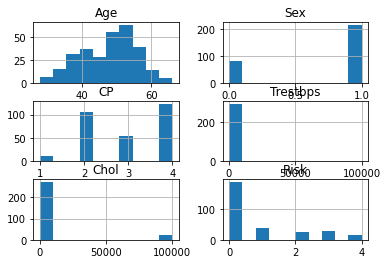

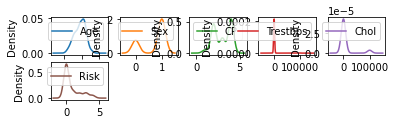

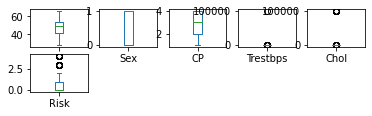

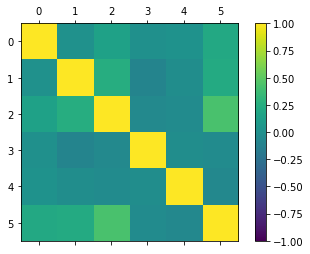

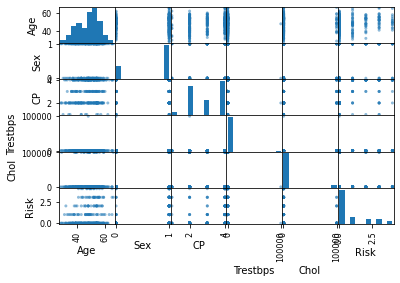

In [2]:
import os
import numpy as np 
from pandas import read_csv
from scipy import stats
z = np.abs(stats.zscore(raw_data))
threshold = 3
print(np.where (z > 3))

from matplotlib import pyplot
import numpy
# Histogram
raw_data.hist()
pyplot.show()
#Density Plots
raw_data.plot(kind='density', subplots=True, layout=(5,5), sharex=False)
pyplot.show()
# Box and Whisker plots
raw_data.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
pyplot.show()
# plot correlation matrix
correlations = raw_data.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()
# Scatterplot Matrix
scatter_matrix(raw_data)
pyplot.show()

# SVM 

In [8]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
filename = 'heart_risk.csv'
names = ['Age','Sex','CP','Trestbps','Chol','Risk']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:5]
Y = array[:,5]
kfold = KFold(n_splits=10, random_state=7, shuffle=True )
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

nan


C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_spa

# Normalization

In [10]:
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'heart_risk.csv'
names = ['Age','Sex','CP','Trestbps','Chol']
dataframefilename = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:5]
Y = array[:,5]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

ValueError: could not convert string to float: 'Age'

# Standardization

In [11]:
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
filename = 'heart_risk.csv'
names = ['Age','Sex','CP','Trestbps','Chol']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

IndexError: index 8 is out of bounds for axis 1 with size 5

In [12]:
# Chi squared classification

In [13]:
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Load the data
filename = 'heart_risk.csv'
names = ['Age','Sex','CP','Trestbps','Chol']
raw_data = read_csv(filename, names=names)
array = raw_data.values
X = array[:,0:5]
Y = array[:,5]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

IndexError: index 5 is out of bounds for axis 1 with size 5